In [37]:
!pip -q install qpsolvers[open_source_solvers]

In [38]:
!pip install -q pyomo

In [39]:
from qpsolvers import solve_qp
import numpy as np
import pandas as pd

In [40]:
Interestrate = pd.read_csv('Lab08_InterestRate.csv')

In [41]:
#Ans-1
a = [[1],[Interestrate.iloc[0,2]],[Interestrate.iloc[0,3]]]
a

[[1], [0.3615], [85.6]]

In [42]:
Dt = np.transpose(a)
P = a*Dt
r = Interestrate.iloc[0,1]
q = np.multiply(a,-2*r)
q

array([[-0.0832   ],
       [-0.0300768],
       [-7.12192  ]])

In [43]:
i=0
a=[[0,0,0],[0,0,0],[0,0,0]]
b=[[0],[0],[0]]
for i in range(20):
  D = [[1],[Interestrate.iloc[i,2]],[Interestrate.iloc[i,3]]]
  D_tran = np.transpose(D)
  p = (D)*(D_tran)
  r = Interestrate.iloc[i,1]
  bu = np.multiply(D,-2*r)
  P = P + p
  b = b + bu

a= np.multiply(P,2)
print(a)
print(b)


[[4.20000000e+01 1.88726000e+01 3.52520000e+03]
 [1.88726000e+01 9.51651718e+00 1.55229572e+03]
 [3.52520000e+03 1.55229572e+03 2.97968600e+05]]
[[  -1.635     ]
 [  -0.77927632]
 [-134.82612   ]]


In [44]:
x=solve_qp(a, b, None, None, None, None, None, None, solver = "osqp")
x

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


array([ 0.11066442,  0.01447785, -0.00093218])

In [45]:
f=[]
for i in range(20):
  l = np.array([1,Interestrate.iloc[i,2],Interestrate.iloc[i,3]])
  r = np.matmul(l,x)
  f.append(r)
print(f)
print(x)



[0.03610319678979891, 0.02907944704697328, 0.03196464198739886, 0.03198631568983283, 0.03539709980117446, 0.047419337140372275, 0.046053015583600795, 0.05121477545093178, 0.04152174038827962, 0.041970786533189655, 0.03451259773400986, 0.026899133987140764, 0.02862260182092473, 0.02770386998064639, 0.031835461611752616, 0.04662819136952211, 0.050640237332724186, 0.05453948527110963, 0.04329069280131667, 0.04401649863100801]
[ 0.11066442  0.01447785 -0.00093218]


In [46]:
ForecastedIntRate=f
ActualRate=[]
for i in range(20):
  Act_Rat=Interestrate.iloc[i,1]
  ActualRate.append(Act_Rat)
x=np.linspace(2003,1,2023)
print(ActualRate)
print(ForecastedIntRate)
print(x)

[0.0416, 0.0312, 0.0354, 0.0331, 0.0399, 0.0501, 0.0421, 0.0507, 0.0431, 0.0437, 0.0398, 0.0274, 0.0298, 0.0261, 0.0358, 0.0504, 0.0478, 0.0549, 0.0468, 0.0478]
[0.03610319678979891, 0.02907944704697328, 0.03196464198739886, 0.03198631568983283, 0.03539709980117446, 0.047419337140372275, 0.046053015583600795, 0.05121477545093178, 0.04152174038827962, 0.041970786533189655, 0.03451259773400986, 0.026899133987140764, 0.02862260182092473, 0.02770386998064639, 0.031835461611752616, 0.04662819136952211, 0.050640237332724186, 0.05453948527110963, 0.04329069280131667, 0.04401649863100801]
[2.00300000e+03 2.00200989e+03 2.00101978e+03 ... 2.98021761e+00
 1.99010880e+00 1.00000000e+00]


In [47]:
ForecastedIntRate=f
ActualRate=[]
for i in range(20):
  Act_Rat=Interestrate.iloc[i,1]
  ActualRate.append(Act_Rat)
x=np.linspace(2003,1,2023)
print(ActualRate)
print(ForecastedIntRate)
print(x)

[0.0416, 0.0312, 0.0354, 0.0331, 0.0399, 0.0501, 0.0421, 0.0507, 0.0431, 0.0437, 0.0398, 0.0274, 0.0298, 0.0261, 0.0358, 0.0504, 0.0478, 0.0549, 0.0468, 0.0478]
[0.03610319678979891, 0.02907944704697328, 0.03196464198739886, 0.03198631568983283, 0.03539709980117446, 0.047419337140372275, 0.046053015583600795, 0.05121477545093178, 0.04152174038827962, 0.041970786533189655, 0.03451259773400986, 0.026899133987140764, 0.02862260182092473, 0.02770386998064639, 0.031835461611752616, 0.04662819136952211, 0.050640237332724186, 0.05453948527110963, 0.04329069280131667, 0.04401649863100801]
[2.00300000e+03 2.00200989e+03 2.00101978e+03 ... 2.98021761e+00
 1.99010880e+00 1.00000000e+00]


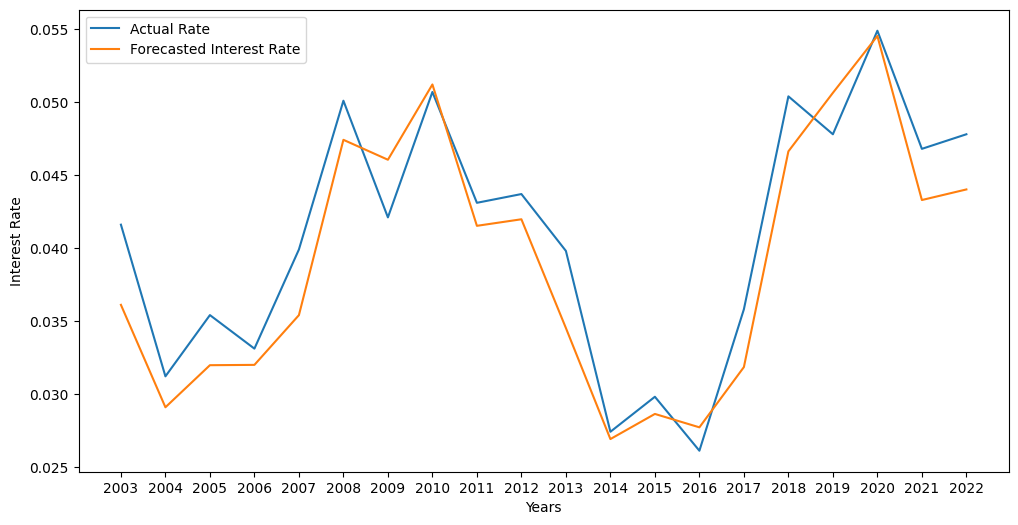

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
x=np.linspace(2003,2022,20)

plt.xticks(x)

plt.plot(x,ActualRate, label='Actual Rate')
plt.plot(x,ForecastedIntRate, label='Forecasted Interest Rate')

plt.xlabel('Years')
plt.ylabel('Interest Rate')
plt.legend()
plt.show()

In [49]:
#Ans-2
P=np.array([[12.982, 0, 0, 0],
            [0, 2.4, 0, 0],
            [0, 0, 0.44, -0.051],
            [0, 0, -0.051, 0.068]])
q=np.array([-6748, -1184, -420.625, -70.41])
G=np.array([[-25.964, -96, -7.08, 0.025],
            [-58.419, -2.4, -5.56, 17.39],
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 0.22, -0.025],
            [0, 0, -0.026, 0.034]])
h=np.array([59861805, 74921464, 1039.59, 986.66, 420.625, 70.41 ])
p=solve_qp(P, q, G, h, None, None, None, None, solver = "osqp")
p

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


array([ 519.79729862,  493.33323229, 1178.42680367, 1919.261641  ])